In [34]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import math
from datetime import datetime
import matplotlib.pyplot as plt

In [70]:
data = pd.read_excel("Données TD3.xlsx")
data['Date'] = pd.to_datetime(data['Date'])
data

date = data['Date']

Z = exp(−rT)(ST − K)+

In [ ]:
# Parameters
S = data['Prix action']
r = 0
T = '31-12-2018'
K = 6

In [171]:
def black_scholes_call(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    call_price = S * N_d1 - K * np.exp(-r * T) * N_d2
    return call_price

def calculate_delta(S, K, r, T, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        delta = norm.cdf(d1)
    else:
        delta = -norm.cdf(-d1)
    return delta

def calculate_gamma(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma
def calculate_vega(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S0 * np.sqrt(T) * norm.pdf(d1)

1/ A partir des données fournies (historique d’une action, colonne B), créez l’historique du portefeuille 
de réplication d’un call européen de maturité le 31/12/2018, de strike 6 et de volatilité constante égale 
à 20%. Ce portefeuille de réplication a-t-il toujours la valeur de l’option ? Pourquoi ?

In [72]:
call_price_BS = []
delta_call = []
gamma_call = []


for i in range(len(data['Date'])):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    call_price_BS.append(black_scholes_call(data['Prix action'][i],6,0,maturity,0.2))
    delta_call.append(calculate_delta(data['Prix action'][i],6,0,maturity,0.2))
    gamma_call.append(calculate_gamma(data['Prix action'][i],6,0,maturity,0.2))
    
data['delta_call'] = delta_call
data['call_price_BS'] = call_price_BS
data['gamma_call'] = gamma_call

data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call
0,2017-10-02,6.742,NaN,NaN,0.736896,1.012460,0.216772
1,2017-10-03,6.955,NaN,NaN,0.780447,1.173632,0.190640
2,2017-10-04,6.910,1.02096,0.59093,0.771918,1.138193,0.196300
3,2017-10-05,7.006,1.09932,0.65885,0.790382,1.212687,0.184633
4,2017-10-06,7.000,1.09306,0.65440,0.789458,1.207450,0.185474
...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.538497,0.258953,0.645599
253,2018-09-28,5.844,0.28498,0.19737,0.417298,0.169706,0.658089
254,2018-10-01,5.724,0.24261,0.16974,0.336647,0.120900,0.638562
255,2018-10-02,5.690,0.24491,0.17452,0.314013,0.108709,0.627796


V0 + delta*(V1-V0)

In [73]:
portflio_values = []

portflio_values.append(call_price_BS[0])
for i in range(1,len(data)):
    portflio_values.append(portflio_values[i-1] + data['delta_call'][i-1]*((data['Prix action'][i])-data['Prix action'][i-1]))

data['portfolio_values'] = portflio_values
data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values
0,2017-10-02,6.742,NaN,NaN,0.736896,1.012460,0.216772,1.012460
1,2017-10-03,6.955,NaN,NaN,0.780447,1.173632,0.190640,1.169419
2,2017-10-04,6.910,1.02096,0.59093,0.771918,1.138193,0.196300,1.134298
3,2017-10-05,7.006,1.09932,0.65885,0.790382,1.212687,0.184633,1.208403
4,2017-10-06,7.000,1.09306,0.65440,0.789458,1.207450,0.185474,1.203660
...,...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.538497,0.258953,0.645599,0.222669
253,2018-09-28,5.844,0.28498,0.19737,0.417298,0.169706,0.658089,0.123586
254,2018-10-01,5.724,0.24261,0.16974,0.336647,0.120900,0.638562,0.073510
255,2018-10-02,5.690,0.24491,0.17452,0.314013,0.108709,0.627796,0.062064


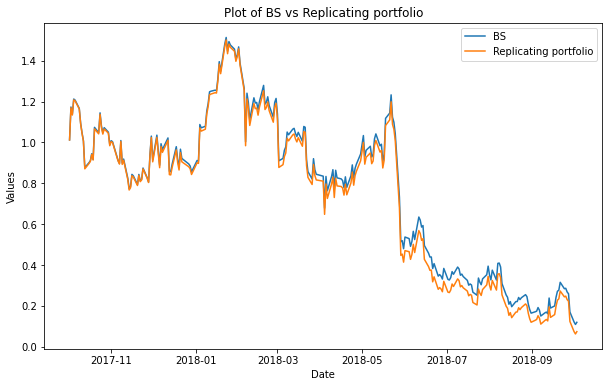

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].values, data['call_price_BS'].values, label='BS')
plt.plot(data['Date'].values, data['portfolio_values'].values, label='Replicating portfolio')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Plot of BS vs Replicating portfolio')
plt.legend()

# Show the plot
plt.show()

0.03121537822667763


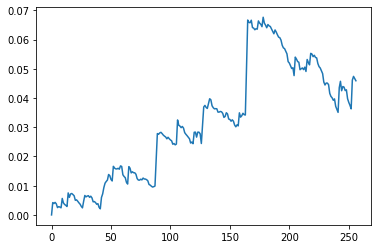

In [79]:
spread_bs_port = data['call_price_BS'].values -data['portfolio_values'].values
plt.plot(spread_bs_port)
print(spread_bs_port.mean())

2/ On suppose qu’on dispose en plus d’une autre option de mêmes caractéristiques (en particulier une 
volatilité de 20%), sinon le strike qui vaut 6.5. On se propose de répliquer notre option initiale en delta 
et en gamma. Comment procéder ? Ce nouveau portefeuille de réplication a-t-il toujours la valeur de 
l’option ?

In [80]:
call_price_BS_2 = []
delta_call_2 = []
gamma_call_2 = []


for i in range(len(data['Date'])):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    call_price_BS_2.append(black_scholes_call(data['Prix action'][i],6.5,0,maturity,0.2))
    delta_call_2.append(calculate_delta(data['Prix action'][i],6.5,0,maturity,0.2))
    gamma_call_2.append(calculate_gamma(data['Prix action'][i],6.5,0,maturity,0.2))
    

data['call_price_BS_2'] = call_price_BS_2
data['delta_call_2'] = delta_call_2
data['gamma_call_2'] = gamma_call_2

data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values,call_price_BS_2,delta_call_2,gamma_call_2
0,2017-10-02,6.742,NaN,NaN,0.736896,1.012460,0.216772,1.012460,0.717437,0.608477,0.255134
1,2017-10-03,6.955,NaN,NaN,0.780447,1.173632,0.190640,1.169419,0.852063,0.660876,0.235955
2,2017-10-04,6.910,1.02096,0.59093,0.771918,1.138193,0.196300,1.134298,0.821935,0.650227,0.240523
3,2017-10-05,7.006,1.09932,0.65885,0.790382,1.212687,0.184633,1.208403,0.884829,0.672962,0.231411
4,2017-10-06,7.000,1.09306,0.65440,0.789458,1.207450,0.185474,1.203660,0.880172,0.671660,0.232239
...,...,...,...,...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.538497,0.258953,0.645599,0.222669,0.085338,0.245782,0.511987
253,2018-09-28,5.844,0.28498,0.19737,0.417298,0.169706,0.658089,0.123586,0.047469,0.159275,0.408992
254,2018-10-01,5.724,0.24261,0.16974,0.336647,0.120900,0.638562,0.073510,0.029332,0.110635,0.330316
255,2018-10-02,5.690,0.24491,0.17452,0.314013,0.108709,0.627796,0.062064,0.025212,0.098443,0.307024


In [87]:
nc = []
for i in range(len(data)):
    nc.append(data['gamma_call'][i]/data['gamma_call_2'][i])
data['nc'] = nc

In [88]:
ns = []
for i in range(len(data)):
    ns.append(data['delta_call'][i] - data['delta_call_2'][i]*data['nc'][i])
data['ns'] = ns

In [89]:
data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values,call_price_BS_2,delta_call_2,gamma_call_2,nc,ns
0,2017-10-02,6.742,NaN,NaN,0.736896,1.012460,0.216772,1.012460,0.717437,0.608477,0.255134,0.849638,0.219911
1,2017-10-03,6.955,NaN,NaN,0.780447,1.173632,0.190640,1.169419,0.852063,0.660876,0.235955,0.807950,0.246492
2,2017-10-04,6.910,1.02096,0.59093,0.771918,1.138193,0.196300,1.134298,0.821935,0.650227,0.240523,0.816138,0.241243
3,2017-10-05,7.006,1.09932,0.65885,0.790382,1.212687,0.184633,1.208403,0.884829,0.672962,0.231411,0.797855,0.253456
4,2017-10-06,7.000,1.09306,0.65440,0.789458,1.207450,0.185474,1.203660,0.880172,0.671660,0.232239,0.798634,0.253047
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.538497,0.258953,0.645599,0.222669,0.085338,0.245782,0.511987,1.260968,0.228573
253,2018-09-28,5.844,0.28498,0.19737,0.417298,0.169706,0.658089,0.123586,0.047469,0.159275,0.408992,1.609050,0.161017
254,2018-10-01,5.724,0.24261,0.16974,0.336647,0.120900,0.638562,0.073510,0.029332,0.110635,0.330316,1.933187,0.122769
255,2018-10-02,5.690,0.24491,0.17452,0.314013,0.108709,0.627796,0.062064,0.025212,0.098443,0.307024,2.044774,0.112719


In [92]:
portflio_values_2 = []
portflio_values_2.append(call_price_BS[0])

for i in range(1,len(data)):
    portflio_values_2.append(portflio_values_2[i-1] + data['ns'][i-1]*(data['Prix action'][i] - data['Prix action'][i-1]) + data['nc'][i-1]*(data['call_price_BS_2'][i]-data['call_price_BS_2'][i-1]))

data['portfolio_values_2'] = portflio_values_2

In [93]:
data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values,call_price_BS_2,delta_call_2,gamma_call_2,nc,ns,portfolio_values_2
0,2017-10-02,6.742,NaN,NaN,0.736896,1.012460,0.216772,1.012460,0.717437,0.608477,0.255134,0.849638,0.219911,1.012460
1,2017-10-03,6.955,NaN,NaN,0.780447,1.173632,0.190640,1.169419,0.852063,0.660876,0.235955,0.807950,0.246492,1.173684
2,2017-10-04,6.910,1.02096,0.59093,0.771918,1.138193,0.196300,1.134298,0.821935,0.650227,0.240523,0.816138,0.241243,1.138250
3,2017-10-05,7.006,1.09932,0.65885,0.790382,1.212687,0.184633,1.208403,0.884829,0.672962,0.231411,0.797855,0.253456,1.212740
4,2017-10-06,7.000,1.09306,0.65440,0.789458,1.207450,0.185474,1.203660,0.880172,0.671660,0.232239,0.798634,0.253047,1.207503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.538497,0.258953,0.645599,0.222669,0.085338,0.245782,0.511987,1.260968,0.228573,0.258080
253,2018-09-28,5.844,0.28498,0.19737,0.417298,0.169706,0.658089,0.123586,0.047469,0.159275,0.408992,1.609050,0.161017,0.168270
254,2018-10-01,5.724,0.24261,0.16974,0.336647,0.120900,0.638562,0.073510,0.029332,0.110635,0.330316,1.933187,0.122769,0.119766
255,2018-10-02,5.690,0.24491,0.17452,0.314013,0.108709,0.627796,0.062064,0.025212,0.098443,0.307024,2.044774,0.112719,0.107626


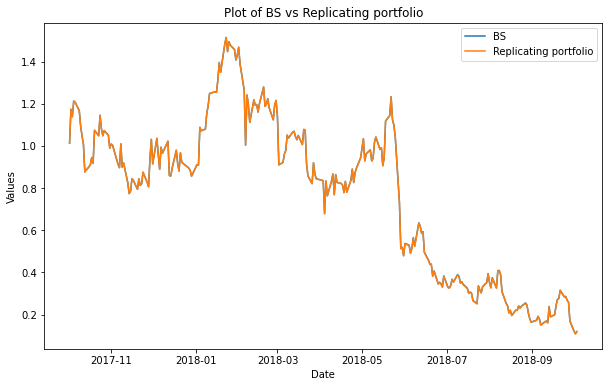

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].values, data['call_price_BS'].values, label='BS')
plt.plot(data['Date'].values, data['portfolio_values_2'].values, label='Replicating portfolio')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Plot of BS vs Replicating portfolio')
plt.legend()

# Show the plot
plt.show()

0.00048718766994259644


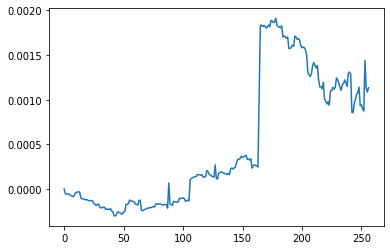

In [96]:
spread_bs_port_2 = data['call_price_BS'].values -data['portfolio_values_2'].values
plt.plot(spread_bs_port_2)
print(spread_bs_port_2.mean())

3/ Représenter le prix d’un call européen en fonction du paramètre de volatilité et calibrer la volatilité 
implicite en utilisant l’algorithme de Newton-Raphson puis l’algorithme de dichotomie.

In [119]:
returns = pd.Series(data['Prix action']).pct_change().dropna()
volatility = returns.std()


0.013833579260167003

In [175]:
window_size = 3

moving_volatility = returns.rolling(window=window_size).std()

data['moving_volatility'] = moving_volatility
data['moving_volatility'].fillna(-1,inplace=True)
data

,Date,Prix action,Prix option strike 6,"Prix option strike 6,5",delta_call,call_price_BS,gamma_call,portfolio_values,call_price_BS_2,delta_call_2,gamma_call_2,nc,ns,portfolio_values_2,moving_volatility,call_price_BS_vol
0,2017-10-02,6.742,NaN,NaN,0.736896,1.012460,0.216772,1.012460,0.717437,0.608477,0.255134,0.849638,0.219911,1.012460,-1.000000,7.420000e-01
1,2017-10-03,6.955,NaN,NaN,0.780447,1.173632,0.190640,1.169419,0.852063,0.660876,0.235955,0.807950,0.246492,1.173684,-1.000000,9.550000e-01
2,2017-10-04,6.910,1.02096,0.59093,0.771918,1.138193,0.196300,1.134298,0.821935,0.650227,0.240523,0.816138,0.241243,1.138250,-1.000000,9.100000e-01
3,2017-10-05,7.006,1.09932,0.65885,0.790382,1.212687,0.184633,1.208403,0.884829,0.672962,0.231411,0.797855,0.253456,1.212740,0.019047,1.006000e+00
4,2017-10-06,7.000,1.09306,0.65440,0.789458,1.207450,0.185474,1.203660,0.880172,0.671660,0.232239,0.798634,0.253047,1.207503,0.010518,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2018-09-27,6.028,0.37835,0.26191,0.538497,0.258953,0.645599,0.222669,0.085338,0.245782,0.511987,1.260968,0.228573,0.258080,0.002971,2.924948e-02
253,2018-09-28,5.844,0.28498,0.19737,0.417298,0.169706,0.658089,0.123586,0.047469,0.159275,0.408992,1.609050,0.161017,0.168270,0.015583,1.359140e-07
254,2018-10-01,5.724,0.24261,0.16974,0.336647,0.120900,0.638562,0.073510,0.029332,0.110635,0.330316,1.933187,0.122769,0.119766,0.014302,7.126760e-15
255,2018-10-02,5.690,0.24491,0.17452,0.314013,0.108709,0.627796,0.062064,0.025212,0.098443,0.307024,2.044774,0.112719,0.107626,0.012364,3.305943e-21


In [176]:
call_price_BS_vol = []
for i in range(len(data)):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    if data['moving_volatility'][i] < 0:
        call_price_BS_vol.append(black_scholes_call(data['Prix action'][i],6,0,maturity,0.013833579260167003))
    else:
        call_price_BS_vol.append(black_scholes_call(data['Prix action'][i],6,0,maturity,data['moving_volatility'][i]))

data['call_price_BS_vol'] = call_price_BS_vol

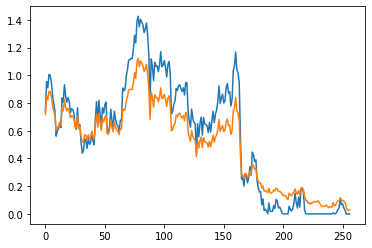

In [177]:
plt.plot(data['call_price_BS_vol'].values)
plt.plot( data['call_price_BS_2'].values)
plt.show()

In [ ]:
# Paramètres
S0 = 100  # Prix spot de l'actif sous-jacent
K = 100  # Prix d'exercice (Strike Price)
T = 1    # Temps jusqu'à l'échéance (en années)
r = 0.05 # Taux d'intérêt sans risque
market_price = 10  # Prix du call observé sur le marché

In [170]:
def implied_volatility_newton_raphson(S0, K, T, r, market_price, sigma_initial_guess=0.2, max_iterations=100, epsilon=1e-6):
    sigma = sigma_initial_guess
    for i in range(max_iterations):
        price = black_scholes_call(S0, K, T, r, sigma)
        vega = calculate_vega(S0, K, T, r, sigma)
        
        # Calcul de la nouvelle estimation de la volatilité
        sigma = sigma - (price - market_price) / vega
        

        if abs(price - market_price) < epsilon:
            return sigma
    return sigma  


In [180]:
implied_vol = []
for i in range(len(data)):
    delta = datetime(2018, 12, 31) - data['Date'][i]
    maturity = delta.days
    maturity /= 365
    implied_vol.append(implied_volatility_newton_raphson(data['Prix action'][i],6,maturity,0,data['Prix option strike 6'][i]))

implied_vol

C:\Users\theom\AppData\Local\Temp\ipykernel_25592\2593681655.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\theom\AppData\Local\Temp\ipykernel_25592\1642048401.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = sigma - (price - market_price) / vega
C:\Users\theom\AppData\Local\Temp\ipykernel_25592\2593681655.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\theom\AppData\Local\Temp\ipykernel_25592\2593681655.py:3: RuntimeWarning: invalid value encountered in scalar multiply
  d2 = d1 - sigma * np.sqrt(T)
C:\Users\theom\AppData\Local\Temp\ipykernel_25592\3289464825.py:22: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\theom\AppData\Local\Temp\ipykernel_25592\25936816

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 3.7522073206062103,
 3.5353011376357726,
 3.1904326512761823,
 3.130264724120994,
 2.434717122274273,
 1.9433137557953784,
 2.357123445731694,
 1.6401665031861419,
 1.6534019678714598,
 2.040390006733285,
 1.8300990903785606,
 1.944689556146313,
 2.019641353296649,
 2.279530584487182,
 2.0873647470431766,
 1.866791711533963,
 2.3207389941377525,
 3.52847831427444,
 nan,
 3.5369929739572985,
 4.877100499671045,
 nan,
 3.0421484500896185,
 3.3379004763839393,
 3.089091578659399,
 3.494809105145632,
 2.7909947198964344,
 2.069866636645479,
 2.924347430037186,
 2.7730447594365